# 6'' 3D FPU with SLIM style spectrometer (outward)


C.Zhang

10/27/2022



In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import * 

g=1.5
d=10
h,l = 6, 33

def addoneHex(ax,L,pos=np.array([0,0]),rot=0,color='k',fill=False,fcolor='w',label=None):
    X0 = np.array([[L,0],[L/2.,sqrt(3)*L/2.],[-L/2.,sqrt(3)*L/2.],[-L,0],[-L/2.,-sqrt(3)*L/2.],[L/2.,-sqrt(3)*L/2.]])
    RM = gen_rotmatx_deg(theta=rot)
    X = np.dot(X0,RM)
    X[:,0] += pos[0]
    X[:,1] += pos[1]
    ax.add_patch(plt.Polygon(X, edgecolor=color, facecolor=fcolor,fill=fill))
    if label:
        ax.text(pos[0],pos[1],label,c=color,ha='center', va='center')
    return X

def gen_rotmatx_deg(theta=0):
    rad = np.radians(theta)
    c, s = np.cos(rad), np.sin(rad)
    RM = np.array(((c, -s), (s, c)))
    return RM

def addonepixel(ax,d=10,pos=np.array([0,0]),color='k',fill=False,fcolor='w',label=None):
    ax.add_patch(plt.Circle(pos, d/2., edgecolor=color,facecolor=fcolor, fill=fill))
    if label:
        ax.text(pos[0],pos[1],label,c=color,ha='center', va='center')
    return pos
    
def addoneFB(ax,h=6,l=33,pos=np.array([0,0]),rot=0,color='k',fill=False,fcolor='w',label=None):
    #h,l = 6, 33
    X0 = np.array([[l/2.,h/2.],[-l/2.,h/2.],[-l/2.,-h/2.],[l/2.,-h/2.]])
    RM = gen_rotmatx_deg(theta=rot)
    X = np.dot(X0,RM)
    X[:,0] += pos[0]
    X[:,1] += pos[1]
    ax.add_patch(plt.Polygon(X, edgecolor=color, facecolor=fcolor,fill=fill))
    if label:
        ax.text(pos[0],pos[1],label,c=color,ha='center', va='center')
    return X

# initiate pixel and FB list

pixellist=[]
ipixel=0
FBlist=[]
iFB=0

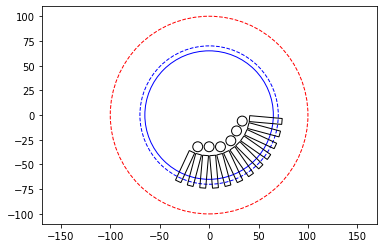

In [2]:
# Second layer

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='b', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='b', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 200/2., edgecolor='r', linestyle='--', fill=False))

Dc = 74.
Dc0=Dc
#addoneHex(ax,Dc/2)

# second layer pixels
for i in range(-1,2):
    pos0=np.array([i*(g+d),-np.sqrt(3)*Dc/4.])
    pixellist.append(addonepixel(ax,d,pos0,label=''))
    ipixel += 1
    RM=gen_rotmatx_deg(-60)
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
    ipixel += 1

# second layer FBs
N=12
ang0=150
rots=np.linspace(-55+ang0,55+ang0,N,endpoint=True)
pos0=np.array([0,Dc/2.+l/2.+4])
for i in range(12):
    RM=gen_rotmatx_deg(rots[i])
    FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+90,label=''))
    iFB += 1
        
ax.set_aspect('equal', adjustable='datalim')
#ax.set_xlim(-25,0)
#ax.set_ylim(-50,-25)
ax.plot()   #Causes an autoscale update.
plt.show()


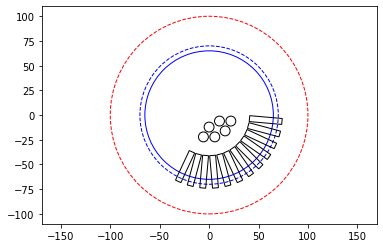

In [3]:
# first layer?

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='b', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='b', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 200/2., edgecolor='r', linestyle='--', fill=False))

#addoneHex(ax,Dc/2)

# second layer pixels
pos0=np.array([0,-np.sqrt(3)*Dc/4.-g-d/2.-np.sqrt(3)*(d+g)/2+(g+d/2.)])
for i in range(-1,1):
    pos0=np.array([(i+0.5)*(g+d),-np.sqrt(3)*Dc/4.+np.sqrt(3)*(d+g)/2])
    pixellist.append(addonepixel(ax,d,pos0,label=''))
    ipixel += 1
    RM=gen_rotmatx_deg(-60)
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
    ipixel += 1
    
pos0=np.array([0,-np.sqrt(3)*Dc/4.+np.sqrt(3)*(d+g)])
pixellist.append(addonepixel(ax,d,pos0,label=''))
ipixel += 1
RM=gen_rotmatx_deg(-60)
pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
ipixel += 1

# second layer FBs
N=12
ang0=150
rots=np.linspace(-55+ang0,55+ang0,N,endpoint=True)
pos0=np.array([0,Dc/2.+l/2.+4])
for i in range(12):
    RM=gen_rotmatx_deg(rots[i])
    FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+90,label=''))
    iFB += 1
        
ax.set_aspect('equal', adjustable='datalim')
#ax.set_xlim(-25,0)
#ax.set_ylim(0,25)
ax.plot()   #Causes an autoscale update.
plt.show()


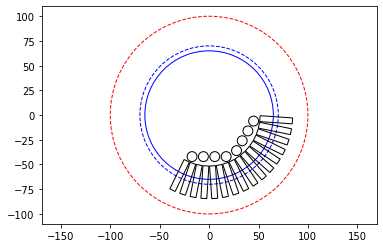

In [7]:
# third layer

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='b', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='b', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 200/2., edgecolor='r', linestyle='--', fill=False))

Dc=(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*(d+g)/2-(g+d/2.))*4/np.sqrt(3)
#addoneHex(ax,Dc/2)

# third layer pixels
pos0=np.array([0,-np.sqrt(3)*Dc/4.])
for i in range(-2,2):
    pos0=np.array([(i+0.5)*(g+d),-np.sqrt(3)*Dc/4.])
    pixellist.append(addonepixel(ax,d,pos0,label=''))
    ipixel += 1
    RM=gen_rotmatx_deg(-60)
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
    ipixel += 1

# third layer FBs
N=16
ang0=150
rots=np.linspace(-56+ang0,56+ang0,N,endpoint=True)
pos0=np.array([0,Dc/2.+l/2.+3])
for i in range(N):
    RM=gen_rotmatx_deg(rots[i])
    FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+90,label=''))
    iFB += 1
        
ax.set_aspect('equal', adjustable='datalim')
#ax.set_xlim(-25,0)
#ax.set_ylim(-55,-30)
ax.plot()   #Causes an autoscale update.
plt.show()

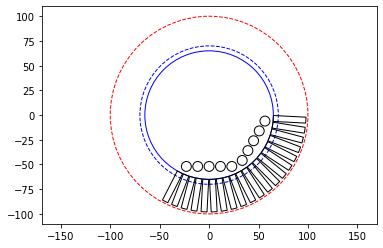

In [9]:
# fourth layer

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='b', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='b', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 200/2., edgecolor='r', linestyle='--', fill=False))

Dc=(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*(d+g)-(g+d/2.))*4/np.sqrt(3)
#addoneHex(ax,Dc/2)

# fourth layer pixels
pos0=np.array([0,-np.sqrt(3)*Dc/4.])
for i in range(-2,3):
    pos0=np.array([i*(g+d),-np.sqrt(3)*Dc/4.])
    pixellist.append(addonepixel(ax,d,pos0,label=''))
    ipixel += 1
    RM=gen_rotmatx_deg(-60)
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
    ipixel += 1

# fourth layer FBs
N=20
ang0=150
rots=np.linspace(-57+ang0,57+ang0,N,endpoint=True)
pos0=np.array([0,Dc/2.+l/2.+5])
for i in range(N):
    RM=gen_rotmatx_deg(rots[i])
    FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+90,label=''))
    iFB += 1
        
ax.set_aspect('equal', adjustable='datalim')
#ax.set_xlim(5,30)
#ax.set_ylim(-65,-40)
ax.plot()   #Causes an autoscale update.
plt.show()

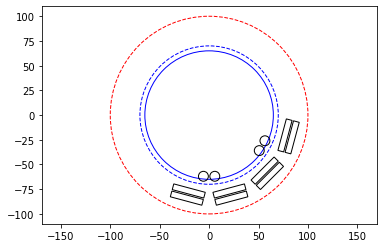

In [10]:
# fourth layer

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='b', fill=False))
ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='b', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 200/2., edgecolor='r', linestyle='--', fill=False))

Dc=(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*3*(d+g)/2.-(g+d/2.))*4/np.sqrt(3)
#addoneHex(ax,Dc/2)

# fourth layer pixels
pos0=np.array([0,-np.sqrt(3)*Dc/4.])
for i in range(-1,1):
    pos0=np.array([(i+0.5)*(g+d),-np.sqrt(3)*Dc/4.])
    pixellist.append(addonepixel(ax,d,pos0,label=''))
    ipixel += 1
    RM=gen_rotmatx_deg(-60)
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),label=''))
    ipixel += 1

# fourth layer FBs
N=4
ang0=150
rots=np.linspace(-45+ang0,45+ang0,N,endpoint=True)
pos0=np.array([0,Dc/2.+h/2.+5])
pos1=np.array([0,Dc/2.+3*h/2.+g+5])
#pos2=np.array([0,Dc/2.- h/2.-g+5])
for i in range(N):
    RM=gen_rotmatx_deg(rots[i])
    FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i],label=''))
    iFB += 1
    FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos1,RM),rot=rots[i],label=''))
    iFB += 1
    #FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos2,RM),rot=rots[i],label=''))
    #iFB += 1
        
ax.set_aspect('equal', adjustable='datalim')
#ax.set_xlim(5,30)
#ax.set_ylim(-65,-40)
ax.plot()   #Causes an autoscale update.
plt.show()

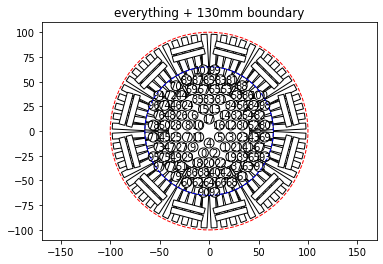

In [62]:
# put everything together

fig, ax = plt.subplots()
Dc = 74.
Dc0=Dc
cs=[['grey','grey','grey'],['k','k','k']]
cm=[1,1,1,1,1]
Ns=[3,3,3,3,3]
tit='everything + 130mm boundary'
fn='all'

pixellist=[]
ipixel=0
FBlist=[]
iFB=0

# first layer
c=cs[cm[0]]
for k in range(Ns[0]):
    drot=120

    # first layer pixels
    for i in range(-1,1):
        pos0=np.array([(i+0.5)*(g+d),-np.sqrt(3)*Dc/4.+np.sqrt(3)*(d+g)/2])
        RM=gen_rotmatx_deg(k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
        ipixel += 1
        RM=gen_rotmatx_deg(-60+k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
        ipixel += 1
    
    pos0=np.array([0,-np.sqrt(3)*Dc/4.+np.sqrt(3)*(d+g)])
    RM=gen_rotmatx_deg(k*drot)
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
    ipixel += 1
    RM=gen_rotmatx_deg(-60+k*drot)
    pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
    ipixel += 1

    # first layer FBs
    N=12
    ang0=150
    rots=np.linspace(-55+ang0,55+ang0,N,endpoint=True)
    pos0=np.array([0,Dc/2.+l/2.+4])
    for i in range(12):
        RM=gen_rotmatx_deg(rots[i]+k*drot)
        FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+90+k*drot,color=c[k],fill=True,label=''))
        iFB += 1

# second layer
c=cs[cm[1]]
for k in range(Ns[1]):
    drot=120
    
    # second layer pixels
    for i in range(-1,2):
        pos0=np.array([i*(g+d),-np.sqrt(3)*Dc/4.])
        RM=gen_rotmatx_deg(k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
        ipixel += 1
        RM=gen_rotmatx_deg(-60+k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
        ipixel += 1

    # second layer FBs
    N=12
    ang0=150
    rots=np.linspace(-55+ang0,55+ang0,N,endpoint=True)
    pos0=np.array([0,Dc/2.+l/2.+4])
    for i in range(12):
        RM=gen_rotmatx_deg(rots[i]+k*drot)
        FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+90+k*drot,color=c[k],fill=True,label=''))
        iFB += 1
    
# third layer
Dc=(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*(d+g)/2-(g+d/2.))*4/np.sqrt(3)
c=cs[cm[2]]
for k in range(Ns[2]):
    drot=120
    
    # third layer pixels
    for i in range(-2,2):
        pos0=np.array([(i+0.5)*(g+d),-np.sqrt(3)*Dc/4.])
        RM=gen_rotmatx_deg(k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
        ipixel += 1
        RM=gen_rotmatx_deg(-60+k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
        ipixel += 1

    # third layer FBs
    N=16
    ang0=150
    rots=np.linspace(-56+ang0,56+ang0,N,endpoint=True)
    pos0=np.array([0,Dc/2.+l/2.+3])
    for i in range(N):
        RM=gen_rotmatx_deg(rots[i]+k*drot)
        FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+90+k*drot,color=c[k],fill=True,label=''))
        iFB += 1
        
# fourth layer
Dc=(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*(d+g)-(g+d/2.))*4/np.sqrt(3)
c=cs[cm[3]]
for k in range(Ns[3]):
    drot=120
    
    # fourth layer pixels
    for i in range(-2,3):
        pos0=np.array([i*(g+d),-np.sqrt(3)*Dc/4.])
        RM=gen_rotmatx_deg(k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
        ipixel += 1
        RM=gen_rotmatx_deg(-60+k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
        ipixel += 1

    # fourth layer FBs
    N=20
    ang0=150
    rots=np.linspace(-57+ang0,57+ang0,N,endpoint=True)
    pos0=np.array([0,Dc/2.+l/2.+5])
    for i in range(N):
        RM=gen_rotmatx_deg(rots[i]+k*drot)
        FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+90+k*drot,color=c[k],fill=True,label=''))
        iFB += 1
  
# fifth layer
c=cs[cm[4]]
for k in range(Ns[4]):
    drot=120
    
    # fifth layer pixels
    Dc=(np.sqrt(3)*Dc0/4.+g+d/2.+np.sqrt(3)*3*(d+g)/2.-(g+d/2.))*4/np.sqrt(3)
    pos0=np.array([0,-np.sqrt(3)*Dc/4.])
    for i in range(-1,1):
        pos0=np.array([(i+0.5)*(g+d),-np.sqrt(3)*Dc/4.])
        RM=gen_rotmatx_deg(k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
        ipixel += 1
        RM=gen_rotmatx_deg(-60+k*drot)
        pixellist.append(addonepixel(ax,d,np.dot(pos0,RM),color=c[k],fill=True,label='%d'%ipixel))
        ipixel += 1

    # fifth layer FBs
    N=4
    ang0=150
    rots=np.linspace(-45+ang0,45+ang0,N,endpoint=True)
    pos0=np.array([0,Dc/2.+h/2.+5])
    pos1=np.array([0,Dc/2.+3*h/2.+g+5])
    for i in range(N):
        RM=gen_rotmatx_deg(rots[i]+k*drot)
        FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos0,RM),rot=rots[i]+k*drot,color=c[k],fill=True,label=''))
        iFB += 1
        FBlist.append(addoneFB(ax,h,l,pos=np.dot(pos1,RM),rot=rots[i]+k*drot,color=c[k],fill=True,label=''))
        iFB += 1
     
ax.set_title(tit)
ax.add_patch(plt.Circle((0, 0), 130/2., edgecolor='b', linestyle='--', fill=False))
#ax.add_patch(plt.Circle((0, 0), 140/2., edgecolor='b', linestyle='--', fill=False))
ax.add_patch(plt.Circle((0, 0), 200/2., edgecolor='r', linestyle='--', fill=False))
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.

plt.savefig('./fpu3Dv1/%s.png'%fn, dpi=180, format='png')
#plt.show()

In [70]:
#pixellist
for i in range(ipixel+1):
    print('%d: x=%.3f, y=%.3f, mm'%(i,pixellist[i][0],pixellist[i][1]))

0: x=-5.750, y=-22.084, mm
1: x=16.250, y=-16.021, mm
2: x=5.750, y=-22.084, mm
3: x=22.000, y=-6.062, mm
4: x=0.000, y=-12.124, mm
5: x=10.500, y=-6.062, mm
6: x=-16.250, y=16.021, mm
7: x=-22.000, y=-6.062, mm
8: x=-22.000, y=6.062, mm
9: x=-16.250, y=-16.021, mm
10: x=-10.500, y=6.062, mm
11: x=-10.500, y=-6.062, mm
12: x=22.000, y=6.062, mm
13: x=5.750, y=22.084, mm
14: x=16.250, y=16.021, mm
15: x=-5.750, y=22.084, mm
16: x=10.500, y=6.062, mm
17: x=-0.000, y=12.124, mm
18: x=-11.500, y=-32.043, mm
19: x=22.000, y=-25.981, mm
20: x=0.000, y=-32.043, mm
21: x=27.750, y=-16.021, mm
22: x=11.500, y=-32.043, mm
23: x=33.500, y=-6.062, mm
24: x=-22.000, y=25.981, mm
25: x=-33.500, y=-6.062, mm
26: x=-27.750, y=16.021, mm
27: x=-27.750, y=-16.021, mm
28: x=-33.500, y=6.062, mm
29: x=-22.000, y=-25.981, mm
30: x=33.500, y=6.062, mm
31: x=11.500, y=32.043, mm
32: x=27.750, y=16.021, mm
33: x=-0.000, y=32.043, mm
34: x=22.000, y=25.981, mm
35: x=-11.500, y=32.043, mm
36: x=-17.250, y=-42.0

IndexError: list index out of range